In [7]:
from rdkit import Chem
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../data/05_model_input/train.csv")
df_cosmo = pd.read_csv("../data/05_model_input/cosmo/train.csv")

In [4]:
molecules = pd.Series(
    pd.concat(
        [df["smiles_1"], df["smiles_2"]]
    )
).unique()

RDKit WARNING: [10:01:41] WARNING: not removing hydrogen atom without neighbors
[10:01:41] WARNING: not removing hydrogen atom without neighbors
/Users/Kobi/Library/Caches/pypoetry/virtualenvs/deep-gamma-hf50-0Vw-py3.7/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


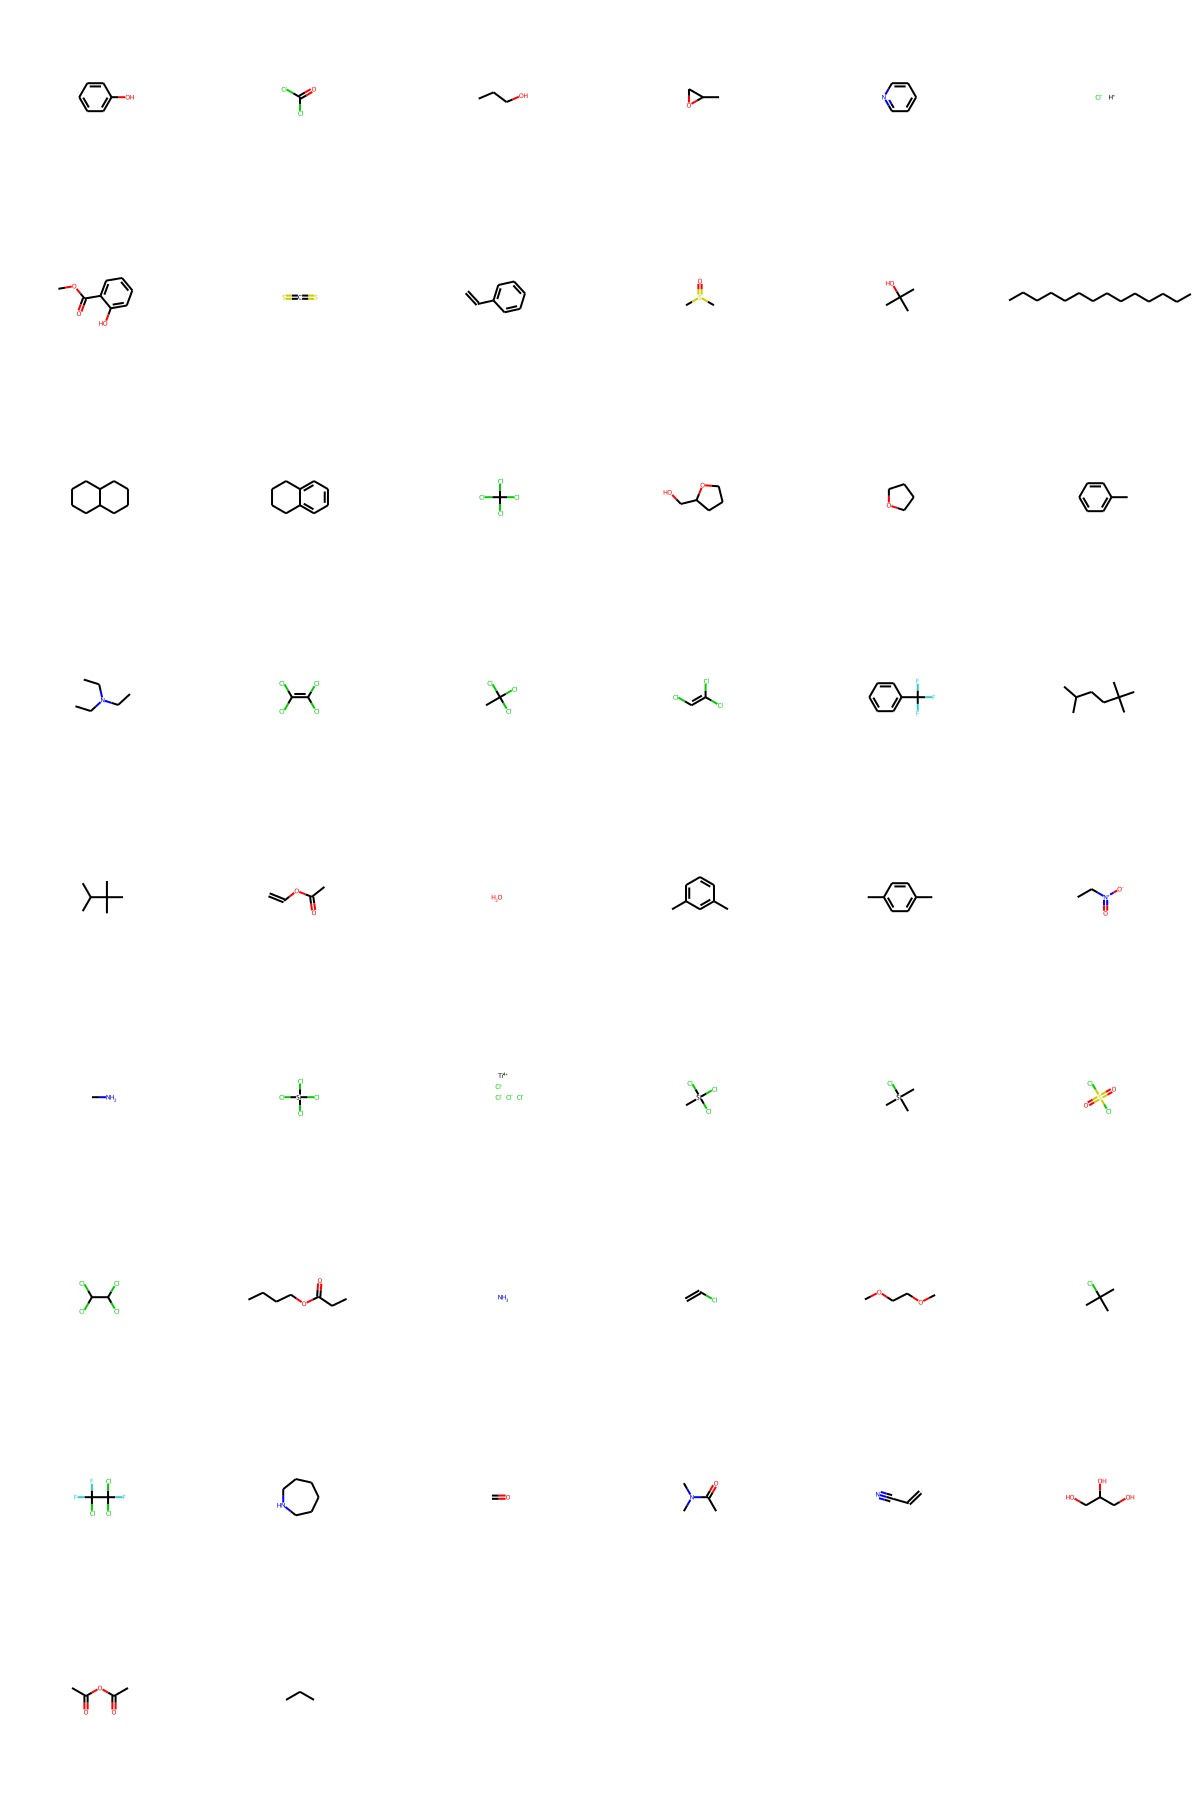

In [5]:
img = Chem.Draw.MolsToGridImage(
    [Chem.MolFromSmiles(smiles) for smiles in molecules[100:200]],
    molsPerRow=6,
    subImgSize=(200, 200),
    returnPNG=False,
)
img

In [13]:
df.groupby("smiles_1")["ln_gamma_1"].max().sort_values(ascending=False)

smiles_1
CCCCCCCCCCCCCC                            17.166716
CCCCCCCCCC                                16.872910
CCCCCCCCCCCC                              16.810102
CC(C)CC(C)(C)C                            15.040444
CCCCCCCC                                  13.845776
                                            ...    
CC(C)CCO                                  -0.000000
CCCCCCCCCCO                               -0.000000
CCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCC    -0.000000
OC1CCCCC1                                 -0.000000
ClC=C                                     -0.000000
Name: ln_gamma_1, Length: 245, dtype: float64

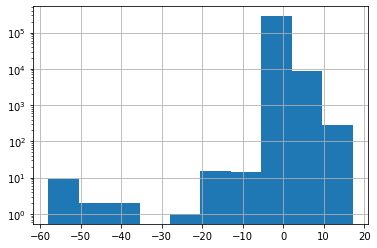

In [8]:
fig, ax = plt.subplots(1)
df["ln_gamma_1"].hist()
ax.set_yscale("log")

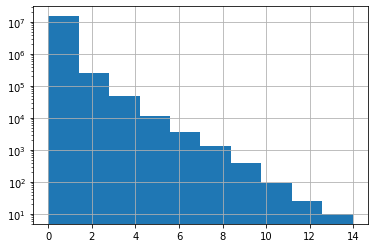

In [11]:
fig, ax = plt.subplots(1)
df_cosmo["ln_gamma_2"].hist()
ax.set_yscale("log")

In [24]:
def check_range(series, min_value, max_value,):
    return (series < max_value).all() and (series >= min_value).all()

In [32]:
groups = []
for idx, group in df.groupby(["smiles_1", "smiles_2"]):
    check = check_range(group["ln_gamma_1"], 0.0, 15.0) and check_range(group["ln_gamma_2"], 0.0, 14.0)
    if check:
        groups.append(group)
new_df = pd.concat(groups, axis=0)

array([[<AxesSubplot:title={'center':'ln_gamma_1'}>,
        <AxesSubplot:title={'center':'ln_gamma_2'}>]], dtype=object)

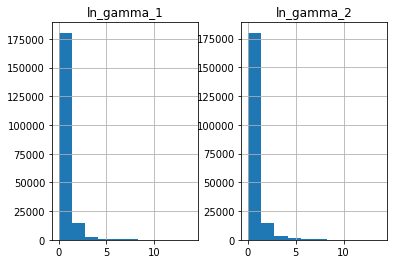

In [34]:
new_df.hist(["ln_gamma_1", "ln_gamma_2"])

In [26]:
check_range(df_cosmo.iloc[:10000]["ln_gamma_2"], 0.0, 14.0)

True